# Predict Bike Sharing Demand with AutoGluon Template

> Add blockquote



## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.8 MB/s eta 0:00:00
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080016 sha256=377c60dfa63a02d1f15d5abb993c92f6bd280f8a05b587a2ccb2a8fd57ec91f8
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.3.4
    Uninstalling bokeh-3.3.4:
      Successfully uninstalled bokeh-3.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.3.8 requires bokeh<3.4.0,

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "shanthinic"
kaggle_key = "a3a5e2bb49f3a41f319ce2eb3dce79fa"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

100% 189k/189k [00:00<00:00, 519kB/s]
100% 189k/189k [00:00<00:00, 518kB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later

# Read the CSV file into a DataFrame and parse the datetime column
train = pd.read_csv('/content/train.csv')

# Display the first few rows of the DataFrame
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
label = 'count'
ignore_columns = ['casual', 'registered']

# Drop the ignore columns from the training dataset
train.drop(columns=ignore_columns, inplace=True)

# Fit the predictor
predictor = TabularPredictor(label=label, eval_metric='root_mean_squared_error', path='agModels-predictCount')
predictor.fit(train_data=train, presets='best_quality', time_limit=600)

Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: agModels-predictCount/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 196 seconds for the sub-fit(s) during dynamic stacking.
Time left for full fit of AutoGluon: 404 seconds.

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.071042  root_mean_squared_error      16.214949  401.632730                0.000631           0.044190            3       True         13
1   RandomForestMSE_BAG_L2  -53.365859  root_mean_squared_error      12.528654  321.960090                0.570734          40.580891            2       True         12
2          LightGBM_BAG_L2  -54.992250  root_mean_squared_error      12.170862  307.286924                0.212943          25.907725            2       True         11
3        LightGBMXT_BAG_L2  -60.490387  root_mean_squared_error      15.430641  335.099924                3.472721          53.720725            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.087793    0.052393   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.69177987427634

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    23.328178
1    42.974304
2    46.510483
3    49.238335
4    51.414032
Name: count, dtype: float32

In [ ]:
predictions.shape

(6493,)

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.565697
std        89.915314
min         2.907872
25%        20.110844
50%        63.598564
75%       167.240234
max       365.590546
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
(predictions < 0).any().any()
predictions.lt(0).value_counts()

count
False    6493
Name: count, dtype: int64

In [ ]:
predictions.iloc[predictions<0] = 0

In [ ]:
# Set them to zero
predictions.describe()

count    6493.000000
mean      100.565697
std        89.915314
min         2.907872
25%        20.110844
50%        63.598564
75%       167.240234
max       365.590546
Name: count, dtype: float64

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 151kB/s]  
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                                     date                 description                        status    publicScore  privateScore  
-------------------------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv                               2024-04-30 08:25:46  first raw submission               complete  1.80056      1.80056       
submission_new_hpo_best_quality_default.csv  2024-04-29 16:35:43  new features with hyperparameters  complete  0.51186      0.51186       
submission_new_hpo.csv                       2024-04-29 16:30:57  new features with hyperparameters  complete  0.52426      0.52426       




```
# This is formatted as code
```

#### Initial score of 1.80056

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

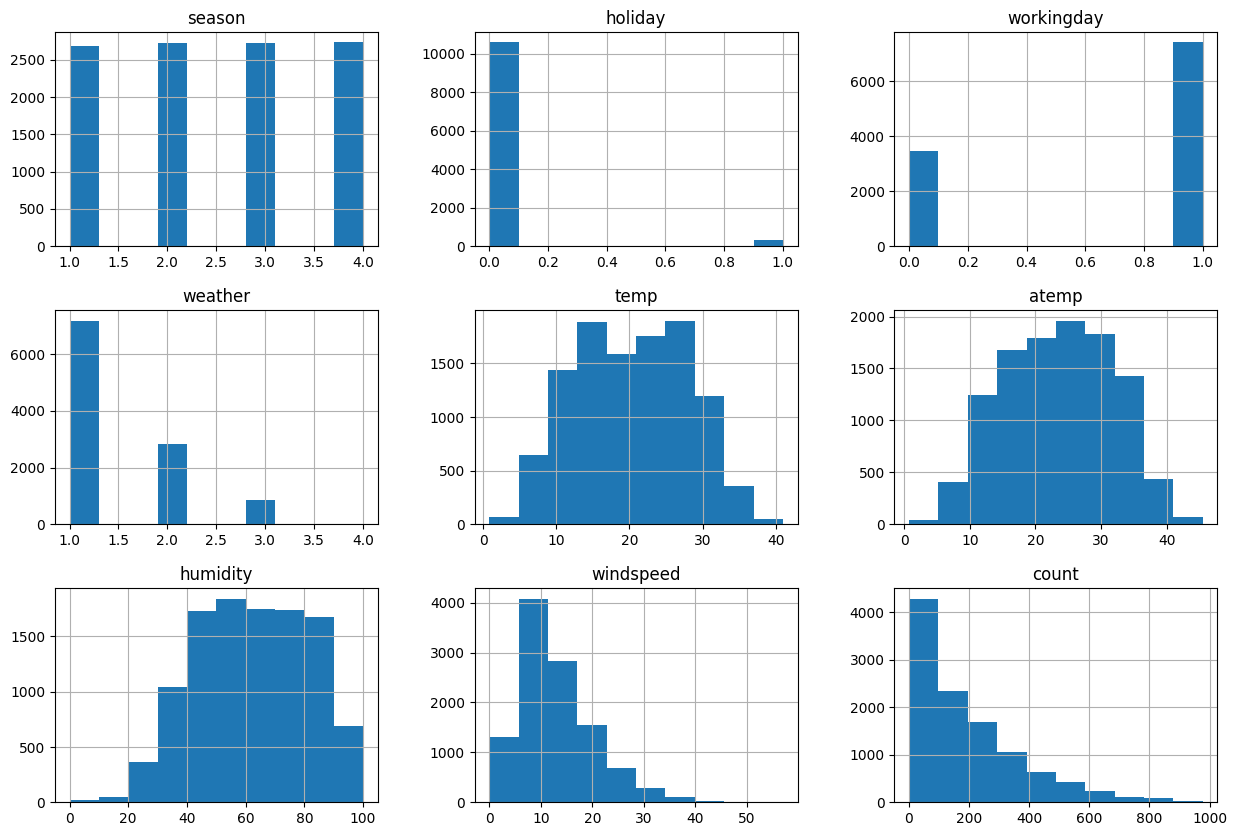

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize = (15,10))

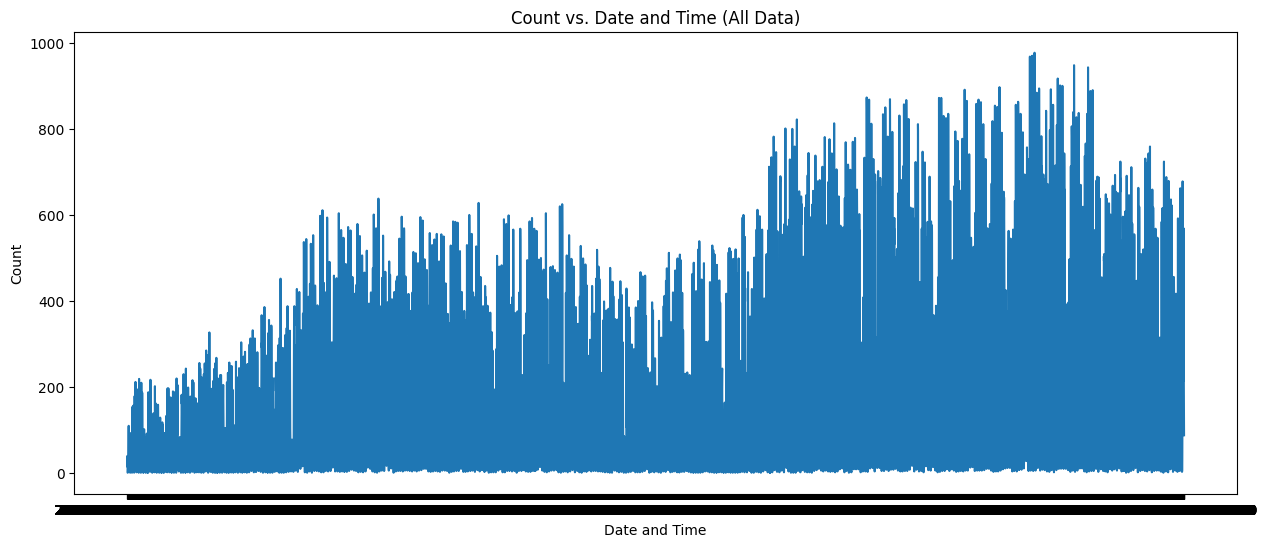

In [ ]:
import matplotlib.pyplot as plt

# Plot entire dataset
plt.figure(figsize=(15, 6))
plt.plot(train['datetime'], train['count'])
plt.xlabel('Date and Time')
plt.ylabel('Count')
plt.title('Count vs. Date and Time (All Data)')
plt.show()

In [ ]:
# Convert 'datetime' column to datetime format
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

# Create new features for year, month, day, hour, and day of week
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayOfWeek'] = train['datetime'].dt.dayofweek

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayOfWeek'] = test['datetime'].dt.dayofweek

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayOfWeek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,dayOfWeek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayOfWeek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'dayOfWeek'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

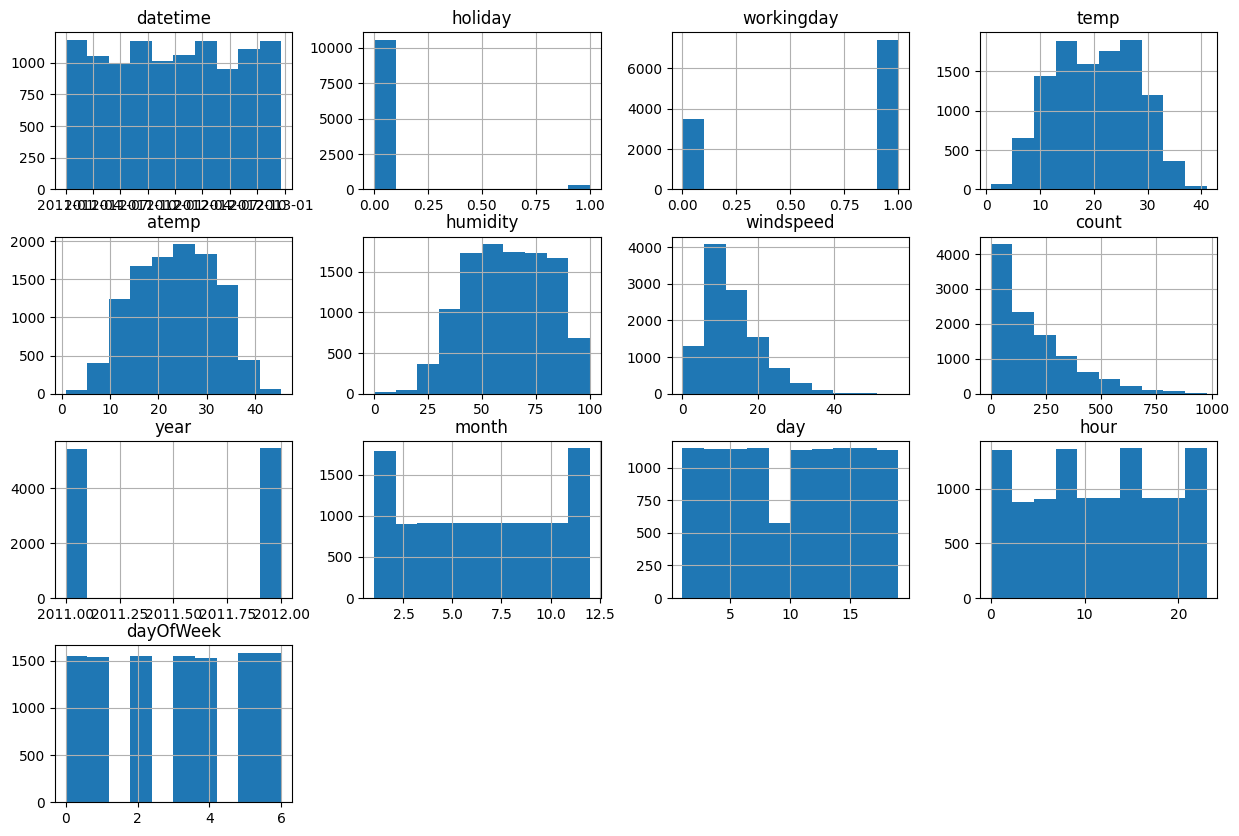

In [ ]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15, 10))

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
ignored_col_list = ['casual', 'registered', 'datetime']
predictor_new_features = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error", learner_kwargs={'ignored_columns': ignored_col_list}).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240430_083209"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240430_083209/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 167 seconds

In [ ]:
predictor_new_features.fit_summary()

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -32.484751  root_mean_squared_error      17.622364  384.667177                0.001047           0.072416            3       True         13
1      WeightedEnsemble_L2  -32.790260  root_mean_squared_error      15.734585  271.940775                0.000770           0.026397            2       True          8
2          CatBoost_BAG_L2  -32.987818  root_mean_squared_error      16.787598  319.336164                0.089726          39.325565            2       True         12
3          LightGBM_BAG_L2  -33.158865  root_mean_squared_error      16.929738  306.128801                0.231867          26.118202            2       True         10
4   RandomForestMSE_BAG_L2  -33.242460  root_mean_squared_error      17.299725  319.150995   

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -119.97880966975461,
  'KNeighborsDist_BAG_L1': -115.038459148802,
  'LightGBMXT_BAG_L1': -34.77198318414741,
  'LightGBM_BAG_L1': -34.43952035710387,
  'RandomForestMSE_BAG_L1': -39.031651980544346,
  'CatBoost_BAG_L1': -35.46724531113075,
  'ExtraTreesM

In [ ]:
predictions = predictor_new_features.predict(test)
negative_values_exist = (predictions < 0).any()
print("Negative values exist in predictions:", negative_values_exist)

Negative values exist in predictions: True


In [ ]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv",  parse_dates=["datetime"])
submission_new_features["count"] = predictor_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 647k/647k [00:01<00:00, 440kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                                     date                 description                        status    publicScore  privateScore  
-------------------------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv                  2024-04-30 08:47:25  new features                       error                                
submission_new_features.csv                  2024-04-30 08:45:58  new features                       error                                
submission.csv                               2024-04-30 08:25:46  first raw submission               complete  1.80056      1.80056       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
ignored_col_list = ['casual','registered', 'datetime']

num_trials = 10  # try at most 10 different hyperparameter configurations for each type of model
search_strategy = 'auto'  #

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(
    label="count",
    problem_type="regression",
    eval_metric="root_mean_squared_error",
    learner_kwargs={'ignored_columns': ignored_col_list}).fit(
        train_data=train,
        time_limit=1200,
        presets="best_quality",
        num_stack_levels=3,
        refit_full=True,
        set_best_to_refit_full=True,
        hyperparameters="default",
        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)


No path specified. Models will be saved in: "AutogluonModels/ag-20240430_085800"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 1200 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240430_085800/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 352 second

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.06%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	-35.1096	 = Validation score   (-root_mean_squared_error)
	50.86s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ... Tuning model for up to 23.11s of the 795.8s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.06%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-34.4645	 = Validation score   (-root_mean_squared_error)
	49.01s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 23.11s of the 746.71s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L1 ...
	-39.0317	 = Validation score   (-root_mean_squared_error)
	15.75s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L1 ... Tuning model for up to 23.11s of the 730.9s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	-43.0262	 = Validation score   (-root_mean_squared_error)
	30.02s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 23.11s of the 700.81s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	-38.6962	 = Validation score   (-root_mean_squared_error)
	9.38s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetFastAI_BAG_L1 ... Tuning model for up to 23.11s of the 691.4s of remaining time.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, i

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-35.9359	 = Validation score   (-root_mean_squared_error)
	30.53s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 23.11s of the 660.48s of remaining time.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1474, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 184, in _hyperparam

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	-33.948	 = Validation score   (-root_mean_squared_error)
	29.74s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 27.26s of the 583.5s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-33.2729	 = Validation score   (-root_mean_squared_error)
	29.17s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L2 ... Tuning model for up to 27.26s of the 554.17s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L2 ...
	-33.5294	 = Validation score   (-root_mean_squared_error)
	47.03s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L2 ... Tuning model for up to 27.26s of the 507.06s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.13%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	-33.3439	 = Validation score   (-root_mean_squared_error)
	31.44s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 27.26s of the 475.54s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...
	-32.9822	 = Validation score   (-root_mean_squared_error)
	14.16s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetFastAI_BAG_L2 ... Tuning model for up to 27.26s of the 461.34s of remaining time.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 2222,

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.15%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-33.4593	 = Validation score   (-root_mean_squared_error)
	25.59s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 27.26s of the 435.63s of remaining time.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1474, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 184, in _hyperparam

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L3/T1 ...
	-34.0803	 = Validation score   (-root_mean_squared_error)
	27.39s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L3 ... Tuning model for up to 26.46s of the 369.53s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L3/T1 ...
	-33.8958	 = Validation score   (-root_mean_squared_error)
	27.56s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L3 ... Tuning model for up to 26.46s of the 341.89s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L3. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L3 ...
	-34.6123	 = Validation score   (-root_mean_squared_error)
	42.03s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L3 ... Tuning model for up to 26.46s of the 299.81s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L3/T1 ...
	-33.2899	 = Validation score   (-root_mean_squared_error)
	32.15s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L3 ... Tuning model for up to 26.46s of the 267.56s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L3. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L3 ...
	-34.2786	 = Validation score   (-root_mean_squared_error)
	12.92s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetFastAI_BAG_L3 ... Tuning model for up to 26.46s of the 254.57s of remaining time.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 2222,

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.14%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L3/T1 ...
	-34.0944	 = Validation score   (-root_mean_squared_error)
	24.12s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L3 ... Tuning model for up to 26.46s of the 230.32s of remaining time.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1474, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 184, in _hyperparam

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L4/T1 ...
	-35.0075	 = Validation score   (-root_mean_squared_error)
	27.33s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L4 ... Tuning model for up to 19.26s of the 165.08s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L4/T1 ...
	-34.4869	 = Validation score   (-root_mean_squared_error)
	29.09s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L4 ... Tuning model for up to 19.26s of the 135.82s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L4. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L4 ...
	-35.0312	 = Validation score   (-root_mean_squared_error)
	42.81s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L4 ... Tuning model for up to 19.26s of the 92.97s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L4/T1 ...
	-34.1094	 = Validation score   (-root_mean_squared_error)
	25.52s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L4 ... Tuning model for up to 19.26s of the 67.33s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L4. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L4 ...
	-34.7627	 = Validation score   (-root_mean_squared_error)
	12.8s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetFastAI_BAG_L4 ... Tuning model for up to 19.26s of the 54.47s of remaining time.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.14%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L4/T1 ...
	-34.8328	 = Validation score   (-root_mean_squared_error)
	23.54s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L4 ... Tuning model for up to 19.26s of the 30.76s of remaining time.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/trainer/abstract_trainer.py", line 2222, in _train_single_full
    hpo_models, hpo_results = model.hyperparameter_tune(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 1474, in hyperparameter_tune
    return self._hyperparameter_tune(hpo_executor=hpo_executor, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 184, in _hyperparame

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                          model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           WeightedEnsemble_L2  -32.769658  root_mean_squared_error       2.519528  182.702018                0.000906           0.044853            2       True         10
1           WeightedEnsemble_L5  -32.797196  root_mean_squared_error       2.877813  364.989187                0.000745           0.094863            5       True         34
2           WeightedEnsemble_L3  -32.802493  root_mean_squared_error       2.878486  364.933587                0.001418           0.039263            3       True         18
3          ExtraTreesMSE_BAG_L2  -32.982192  root_mean_squared_error       2.519371  243.397492                0.000215          14.158176            2       True         15
4            LightGBM_BAG_L2/T1  -33.272919  root_mean_squared_error

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBMXT_B

In [ ]:
# Make predictions on the test dataset
predictions = predictor_new_hpo.predict(test)

# Replace negative predictions with zero
predictions[predictions < 0] = 0

# Update the predictions in the predictor_new_hpo object
predictor_new_hpo.predictions = predictions


In [ ]:
# Make predictions on the test dataset
# predictions = predictor_new_hpo.predict(test)

# Create a DataFrame for submission
submission_new_hpo = pd.DataFrame({
    "datetime": test["datetime"],  # Assuming test dataset contains a datetime column
    "count": predictions  # Use the predictions generated by the predictor
})

# Save the submission DataFrame to a CSV file
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)


In [ ]:
predictions_new_hpo = predictor_new_hpo.predict(test, model='WeightedEnsemble_L2')
predictions_new_hpo.head()

0    15.618712
1     0.996278
2    -1.043361
3     0.970860
4     0.687304
Name: count, dtype: float32

In [ ]:
predictions_new_hpo = predictor_new_hpo.predict(test, model='WeightedEnsemble_L2')
predictions_new_hpo.head()

0    15.618712
1     0.996278
2    -1.043361
3     0.970860
4     0.687304
Name: count, dtype: float32

In [ ]:
predictions_new_hpo.lt(0).value_counts()
predictions_new_hpo.iloc[predictions_new_hpo<0] = 0

In [ ]:
predictions_new_hpo.describe()

count    6493.000000
mean      190.106155
std       172.839996
min         0.000000
25%        46.747536
50%       149.931320
75%       281.759521
max       899.635132
Name: count, dtype: float64

In [ ]:
submission_new_hpo = pd.read_csv("sampleSubmission.csv",  parse_dates=["datetime"])
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo_best_quality_default.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_best_quality_default.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 166kB/s]  
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                                     date                 description                        status    publicScore  privateScore  
-------------------------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo_best_quality_default.csv  2024-04-30 09:20:18  new features with hyperparameters  complete  0.51558      0.51558       
submission_new_features.csv                  2024-04-30 08:47:25  new features                       error                                
submission_new_features.csv                  2024-04-30 08:45:58  new features                       error                                


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

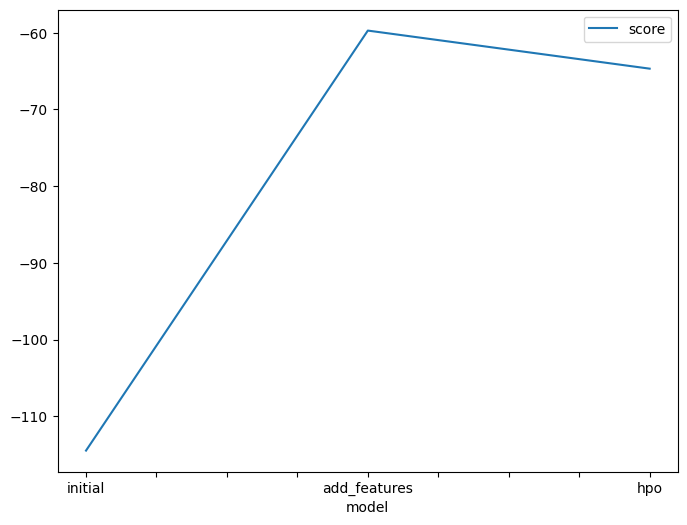

In [65]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-114.471103, -59.735369, -64.698247]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

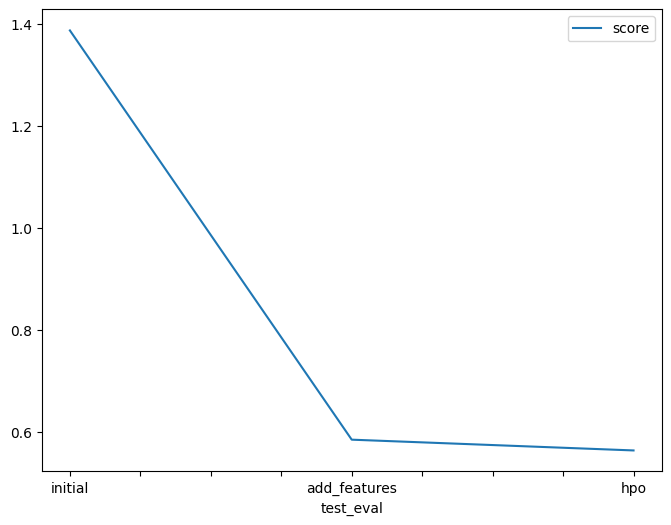

In [66]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.38713, 0.58444, 0.56331]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table



In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features_one_hot_encoded", "hpo"],
    "time_limit": [600,  600, 1200],
    "num_stack_levels": [1,  1, 3],
    "num_trials": [1,  1, 10],
    "score": [1.38713, 0.58444, 0.56331]
})

,model,time_limit,num_stack_levels,num_trials,score
0,initial,600,1,1,1.38713
1,add_features_one_hot_encoded,600,1,1,0.58444
2,hpo,1200,3,10,0.56331


In [ ]:
from google.colab import files

In [ ]:
import shutil
import os

# Directory to be compressed
directory_to_zip = '/content/AutogluonModels'

# Output zip file
output_zip_file = 'AutogluonModels'

# Create a zip file
shutil.make_archive(output_zip_file, 'zip', directory_to_zip)

# Download the zip file
files.download(output_zip_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# import shutil
# import os

# Directory to be compressed
directory_to_zip = '/content/agModels-predictCount'

# Output zip file
output_zip_file = 'agModels-predictCount'

# Create a zip file
shutil.make_archive(output_zip_file, 'zip', directory_to_zip)

# Download the zip file
files.download(output_zip_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>